This is taken from a paper published by MITSUBISHI ELECTRIC RESEARCH LABORATORIES

titled  "Development of a fast fluid dynamics model based on PISO algorithm for simulating indoor airflow" 

by Li, Sibo; Qiao, Hongtao dated October 19, 2021 

with publication number TR2021-120.

The paper details a method for modeling buoyancy driven flows using the Boussinesq approximation around a PISO solver. The paper also provides a very clear description of the PISO algorithm, which was used to create the notes here.

An excellent graphic, also from the paper, is below.

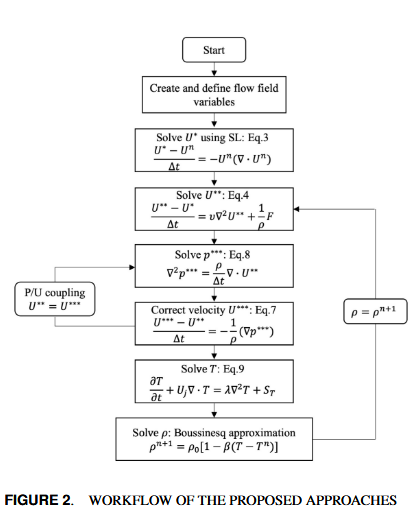

---

The incompressible Navier-Stokes equation is (in vector form):
\begin{equation} \tag{NSE}
\frac{\partial \mathbf{u}}{\partial t} + (\mathbf{u} \cdot \nabla) \mathbf{u} = - \frac{1}{\rho} \nabla p + \nu \nabla^2 \mathbf{u} + f
\end{equation}

where $\nu = \mu / \rho$: the kinematic viscosity is equal to the dynamic viscosity divided by the density.

The effect of gravity or any body forces can be included on the right hand side as $f$, where the units are m/s^2 (acceleration).
A force per volume $F$ can also be included as the term $\frac{1}{\rho}F$ where $F$ has units $N/m^3$.

# PISO

The Pressure Implicit with Splitting of Operator (PISO) method has the following general steps:
1) Calculate intermediate velocity from NSE. The pressure can be included or ignored.
2) Using the intermediate velocity, solve pressure poisson equation to obtain the first pressure field. 
    a) Calculate the first corrected velocity using the pressure field. This velocity field should be divergence free, so it satisfies continuity.
    b) However, the pressure field no longer satisfies the pressure poisson equation when the first corrected velocity is plugged in. This pressure field was used as a corrector for the velocity field, but is itself intermediate.
3) Using the first corrected velocity, solve the pressure poisson equation for the second pressure field, and obtain the second corrected velocity.
    a) Generally, PISO stops here after a second corrected velocity has been obtained.
    b) Convergence could also be when the correction applied becomes sufficiently small.

The steps of the algorithm are presented in more detail below.

## 1) Intermediate Velocity

Equation 1A details an explicit advance, while 1B details a semi implicit advance where the self advection term is not treated as part of the implicit timestep.

\begin{equation} \tag{1A}
\frac{\mathbf{u}^*}{\Delta t} = \frac{\mathbf{u}^n}{\Delta t} - (\mathbf{u}^n \cdot \nabla) \mathbf{u}^n - \frac{1}{\rho} \nabla p + \nu \nabla^2 \mathbf{u}^n
\end{equation}

\begin{equation} \tag{1B}
\frac{\mathbf{u}^*}{\Delta t} - \nu \nabla^2 \mathbf{u}^*= \frac{\mathbf{u}^n}{\Delta t} - (\mathbf{u}^n \cdot \nabla) \mathbf{u}^n - \frac{1}{\rho} \nabla p
\end{equation}

## 2) Pressure Poisson Equation

The intermediate velocity can be corrected from the pressure field, as shown below.
\begin{equation} \tag{2}
\frac{\mathbf{u}^{n+1} - \mathbf{u}^*}{\Delta t} = - \frac{1}{\rho} \nabla p^{n+1}
\end{equation}

However, we don't know the pressure $p$. But, if we assume the corrected velocity field is divergence free (which it should be), then:
\begin{equation} \tag{2.1}
\nabla^2 p^{n+1} = \frac{\rho}{\Delta t} \nabla \cdot \mathbf{u}^*
\end{equation}

and:
\begin{equation} \tag{2.2}
\mathbf{u}^{n+1} = \mathbf{u}^* - \frac{\Delta t}{\rho} \nabla p^{n+1}
\end{equation}

### PISO Iterative Correction
The general scheme described previously of pressure poisson equation followed by velocity correction is the original Chorin's projection method. You iterate on these corrections for PISO.

To be clear, the right hand side of the following equations are the knowns.

From Equation CA, we use $u^*$ to obtain $p^*$.

\begin{equation} \tag{CA}
\nabla^2 p^{*} = \frac{\rho}{\Delta t} \nabla \cdot \mathbf{u}^{*}
\end{equation}

Then, from Equation BC, obtain $u^{**}$ using $p^*$.
\begin{equation} \tag{CB}
\mathbf{u}^{**} = \mathbf{u}^* - \frac{\Delta t}{\rho} \nabla p^{*}
\end{equation}

From here, you can go back to Equation CA and use $u^{**}$ to obtain $p^{**}$, then $u^{***}$ from Equation CB.

Then, you could stop, or continue iterating until the corrections $-\frac{\Delta t}{\rho} \nabla p^{*}$ are sufficiently small.